In [1]:
pip install fanalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import sklearn.impute as impute
from fanalysis.ca import CA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the data

In [3]:
data_rooth='/kaggle/input/amazon-consumer-behaviour-dataset/Amazon Customer Behavior Survey.csv'
dataset=pd.read_csv(data_rooth)
dataset

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


# Data preprocessing

In [4]:
dataset.isnull().sum()*100/len(dataset)

Timestamp                                 0.000000
age                                       0.000000
Gender                                    0.000000
Purchase_Frequency                        0.000000
Purchase_Categories                       0.000000
Personalized_Recommendation_Frequency     0.000000
Browsing_Frequency                        0.000000
Product_Search_Method                     0.332226
Search_Result_Exploration                 0.000000
Customer_Reviews_Importance               0.000000
Add_to_Cart_Browsing                      0.000000
Cart_Completion_Frequency                 0.000000
Cart_Abandonment_Factors                  0.000000
Saveforlater_Frequency                    0.000000
Review_Left                               0.000000
Review_Reliability                        0.000000
Review_Helpfulness                        0.000000
Personalized_Recommendation_Frequency     0.000000
Recommendation_Helpfulness                0.000000
Rating_Accuracy                

In [5]:
# We can remove the Timestamp column because it's constant

data=dataset.drop(columns=['Timestamp'])


# There is 33 percent of missing values in the Product_Search_Method column
# We think we can reasonnabilly replace them by the most frequent value
value=data['Product_Search_Method'].mode()[0]
data.fillna(value,inplace=True)

data.dtypes

age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfaction                      int64
Service_Appreciation

In [6]:
#identify all categorical variables
cat_columns = data.select_dtypes(['object']).columns

#convert all categorical variables to numeric
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x))


/tmp/ipykernel_32/1998249152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


Text(0.5, 1.0, "age's histogramm")

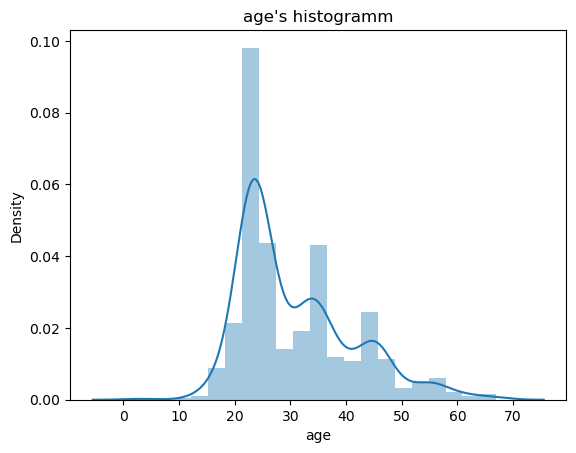

In [7]:
sns.distplot(data['age'])
plt.title("age's histogramm")

<Axes: xlabel='age', ylabel='Density'>

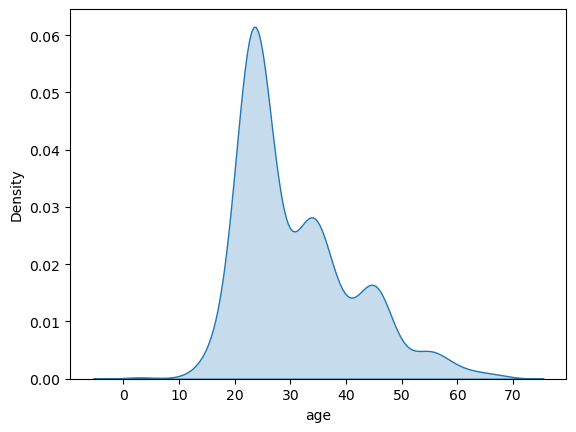

In [9]:
sns.kdeplot(data=data,x='age',fill=True)

Most of clients (78 %) are between 20 and 40 years old

In [ ]:
p=0
for v in data['age']:
    if (v>=20 and v<=40):
        p+=1
p*100/len(data)

data['Purchase_Frequency']

Text(0.5, 1.0, 'Purchase_Frequency')

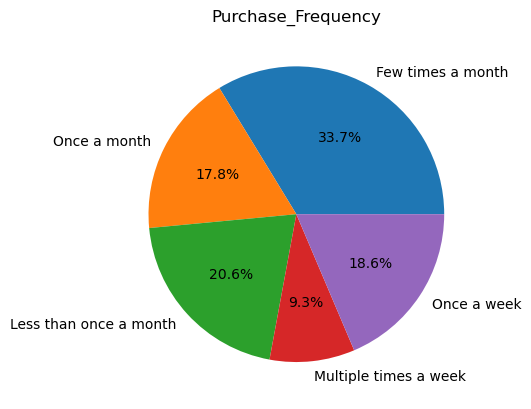

In [22]:
counts=np.unique(data['Purchase_Frequency'][0],return_counts=True)
plt.pie(counts[1],labels=data['Purchase_Frequency'][1],autopct='%0.01f%%')
plt.title('Purchase_Frequency')

Text(0.5, 1.0, 'Purchase_Categories')

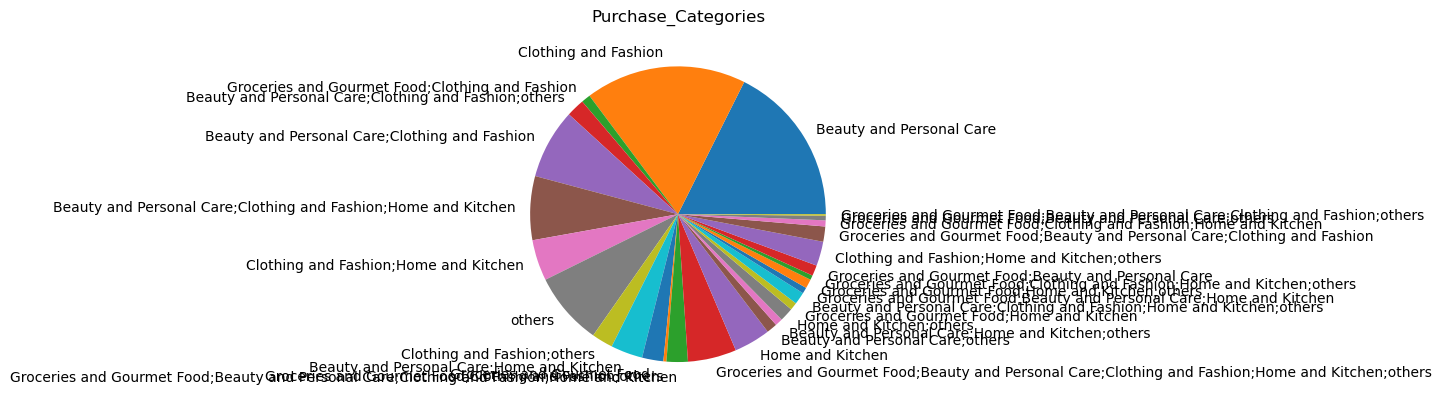

In [11]:
dist=np.unique(data['Purchase_Categories'][0],return_counts=True)
plt.pie(dist[1],labels=data['Purchase_Categories'][1])
plt.title('Purchase_Categories')

Most of Purchase_categories concern clothing, fashion, beauty and care

Index(['Competitive prices', 'Wide product selection',
       'User-friendly website/app interface', '.', 'Customer service ',
       'Product recommendations', 'Customer service', 'Quick delivery',
       'All the above'],
      dtype='object')

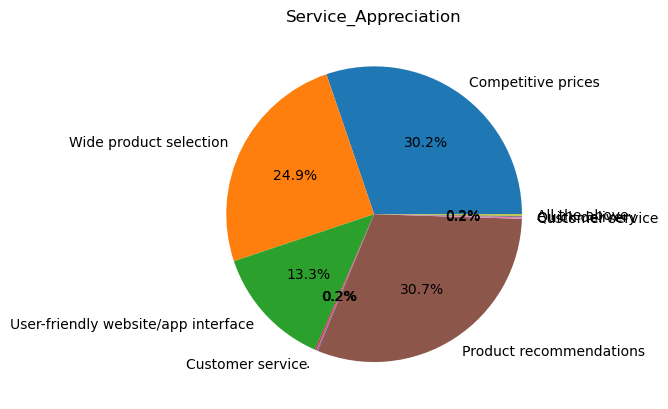

In [15]:
dist=np.unique(data['Service_Appreciation'][0],return_counts=True)
plt.pie(dist[1],labels=data['Service_Appreciation'][1],autopct='%0.01f%%')
plt.title('Service_Appreciation')
data['Service_Appreciation'][1]

Amazon should more invest and improve the service client and the quick delivery

<Axes: >

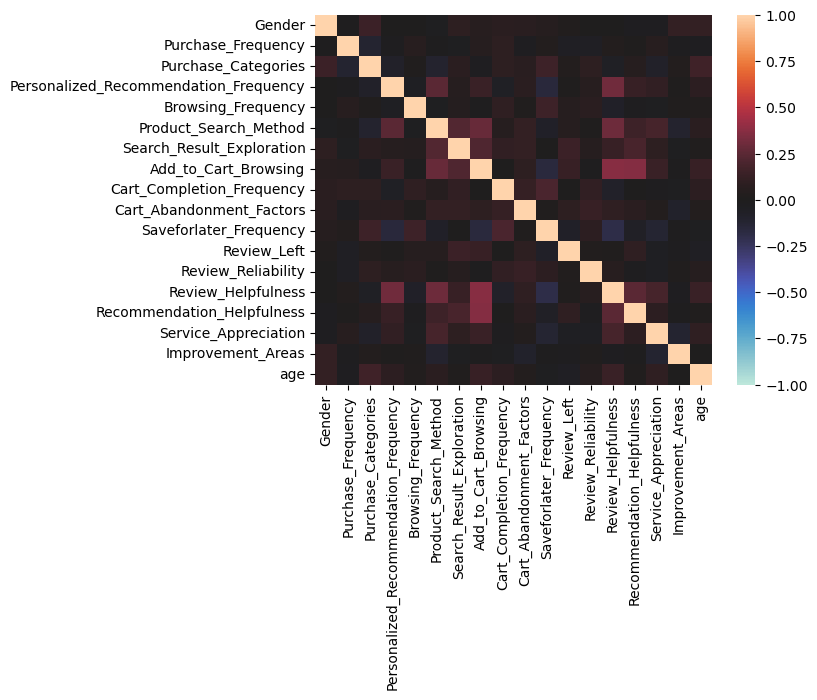

In [17]:
dataset.fillna('categories',inplace=True)
x = dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

x['age']=data['age']
corr=x.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0)

There are not many correlations between the data.Except,between the Ad-to_cart_browsing and the review_helpfulness,Recommendation_helpulness both. 

In [19]:
df=pd.crosstab(dataset['Purchase_Categories'],dataset['Purchase_Frequency'])


In [ ]:
df

In [20]:
ca=CA(n_components=2,row_labels=df.index.values,col_labels=df.columns.values,stats=True)
matrix=df.values
ca.fit(matrix)


CA(col_labels=array(['Few times a month', 'Less than once a month',
       'Multiple times a week', 'Once a month', 'Once a week'],
      dtype=object),
   n_components=2,
   row_labels=array(['Beauty and Personal Care',
       'Beauty and Personal Care;Clothing and Fashion',
       'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen',
       'Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others',
       'Beauty...
       'Groceries and Gourmet Food;Clothing and Fashion',
       'Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen',
       'Groceries and Gourmet Food;Clothing and Fashion;Home and Kitchen;others',
       'Groceries and Gourmet Food;Clothing and Fashion;others',
       'Groceries and Gourmet Food;Home and Kitchen',
       'Groceries and Gourmet Food;Home and Kitchen;others',
       'Home and Kitchen', 'Home and Kitchen;others', 'others'],
      dtype=object))

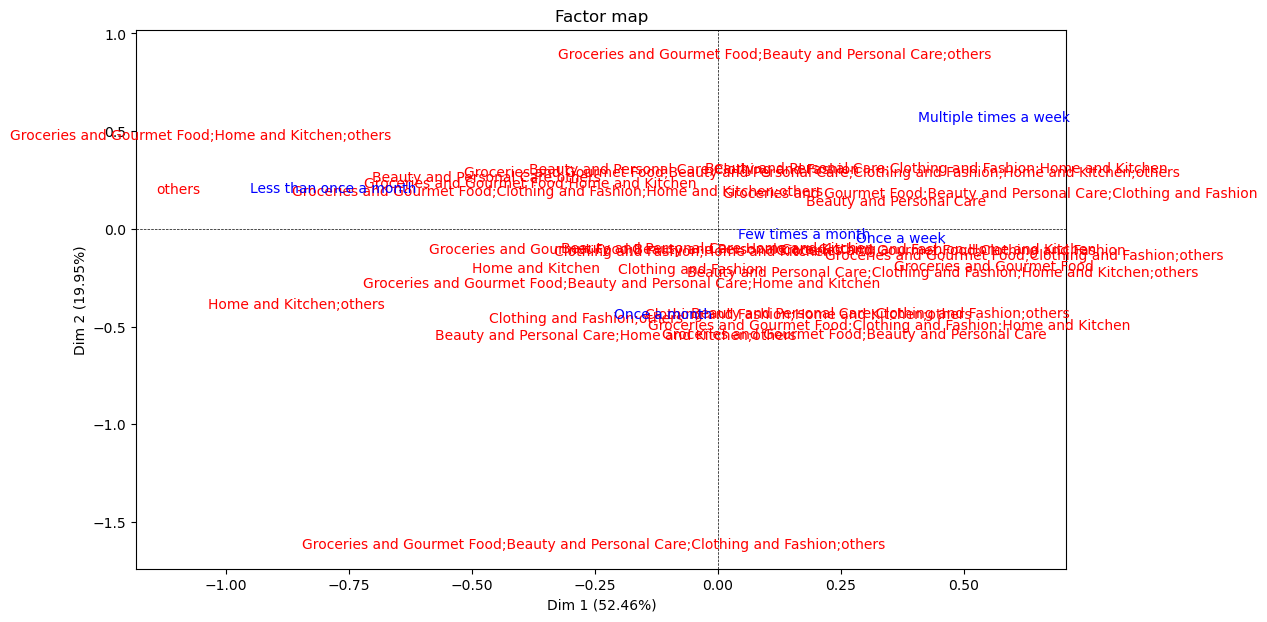

In [21]:
ca.mapping(num_x_axis=1,num_y_axis=2,figsize=(12,7))

Many products are bought few times a week and once a week